### Custom embedder for parametric UMAP. 
This notebook shows you how to run a UMAP projection with a custom embedder. 

In [69]:
import tensorflow_probability as tfp

In [70]:
tfp.__version__

'0.12.1'

### load data

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, Y_train), (test_images, Y_test) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], -1))/255.
test_images = test_images.reshape((test_images.shape[0], -1))/255.

### create parametric umap model

In [4]:
from umap.parametric_umap import ParametricUMAP

In [5]:
embedder = ParametricUMAP(global_correlation_loss_weight = 0.1, verbose=True)

In [6]:
embedding = embedder.fit_transform(train_images)

ParametricUMAP(global_correlation_loss_weight=0.1,
               optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff12bf43dd0>)
Construct fuzzy simplicial set
Thu Feb 11 00:01:35 2021 Finding Nearest Neighbors
Thu Feb 11 00:01:35 2021 Building RP forest with 17 trees
Thu Feb 11 00:01:37 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Thu Feb 11 00:01:53 2021 Finished Nearest Neighbor Search
Thu Feb 11 00:01:55 2021 Construct embedding
running eagerly
Epoch 1/10
724/724 [==============================] - 36s 49ms/step - loss: 0.2417 - global_correlation_loss: -0.5983 - umap_loss: 0.3015
Epoch 2/10
724/724 [==============================] - 37s 51ms/step - loss: 0.1223 - global_correlation_loss: -0.6354 - umap_loss: 0.1858
Epoch 3/10
724/724 [==============================] - 37s 51ms/step - loss: 0.1044 - global_correlation_loss: -0.6259 - umap_loss: 0.1670
Epoch 4/10
724/724 [====

### plot results

In [7]:
embedding = embedder.embedding_

In [8]:
import matplotlib.pyplot as plt

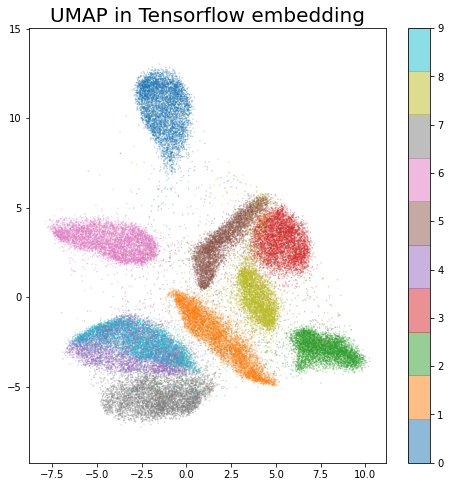

In [9]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=Y_train.astype(int)[:len(embedding)],
    cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("UMAP in Tensorflow embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

### measure at global structure as correlation of pairwise distances

In [17]:
import numpy as np
import scipy.stats
import sklearn

In [51]:
nex = 1000
sample1 = np.random.randint(len(train_images), size=nex)
sample2 = np.random.randint(len(train_images), size=nex)
x1 = train_images[sample1]
x2 = train_images[sample2]
z1 = embedding[sample1]
z2 = embedding[sample2]
x_dist = sklearn.metrics.pairwise_distances(x1, x2).flatten()

z_dist = sklearn.metrics.pairwise_distances(z1, z2).flatten()

corr, p = scipy.stats.pearsonr(x_dist, z_dist)
print("r^2={}, p={}".format(corr, p))

r^2=0.5840981129734057, p=0.0


Text(0, 0.5, 'Embedding distances')

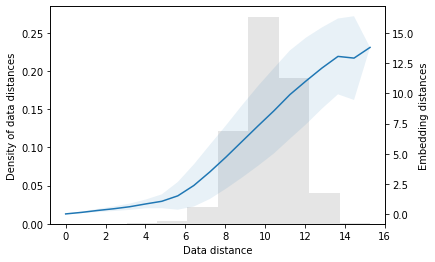

In [49]:
fig, ax = plt.subplots()

ax.hist(x_dist, color = 'k', alpha = 0.1, density=True)
ax.set_ylabel('Density of data distances')
ax.set_xlabel('Data distance')

ax2 = ax.twinx()
bins = np.linspace(np.min(x_dist), np.max(x_dist), 20)
xbins = np.digitize(x_dist, bins = bins)
zmean = np.array([np.mean(z_dist[xbins == i]) for i in np.unique(xbins)])
zstd = np.array([np.std(z_dist[xbins == i]) for i in np.unique(xbins)])
ax2.plot(bins, zmean)
ax2.fill_between(bins, zmean-zstd, zmean+zstd, alpha = 0.1)
ax2.set_ylabel('Embedding distances')


In [39]:
zsem

array([0.00000000e+00, 2.06965916e-02, 2.29964447e-03, 6.05411804e-04,
       3.33055398e-04, 2.36771369e-04, 2.15370349e-04, 1.99359647e-04,
       1.14750215e-04, 5.26514992e-05, 2.64459917e-05, 1.71515451e-05,
       1.43632578e-05, 1.67271770e-05, 2.75731805e-05, 5.96420892e-05,
       1.86305396e-04, 1.02260945e-03, 3.40716418e-02, 0.00000000e+00])

### plotting loss

In [10]:
embedder._history.keys()

dict_keys(['loss', 'global_correlation_loss', 'umap_loss'])

Text(0, 0.5, 'global_correlation_loss')

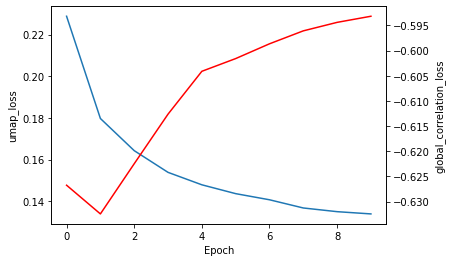

In [53]:
fig, ax = plt.subplots()
ax.plot(embedder._history['umap_loss'])
ax.set_ylabel('umap_loss')
ax.set_xlabel('Epoch')
ax2 = ax.twinx()
ax2.plot(embedder._history['global_correlation_loss'], color = 'r')
ax2.set_ylabel('global_correlation_loss')


## Repeat with more global structure

### create parametric umap model

In [54]:
embedder = ParametricUMAP(global_correlation_loss_weight = 1.0, verbose=True)

In [55]:
embedding = embedder.fit_transform(train_images)

ParametricUMAP(global_correlation_loss_weight=1.0,
               optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7feee4c99050>)
Construct fuzzy simplicial set
Thu Feb 11 00:26:55 2021 Finding Nearest Neighbors
Thu Feb 11 00:26:55 2021 Building RP forest with 17 trees
Thu Feb 11 00:26:56 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Thu Feb 11 00:27:01 2021 Finished Nearest Neighbor Search
Thu Feb 11 00:27:01 2021 Construct embedding
running eagerly
Epoch 1/10
724/724 [==============================] - 40s 55ms/step - loss: -0.3897 - global_correlation_loss: -0.7133 - umap_loss: 0.3236
Epoch 2/10
724/724 [==============================] - 40s 55ms/step - loss: -0.5353 - global_correlation_loss: -0.7662 - umap_loss: 0.2309
Epoch 3/10
724/724 [==============================] - 36s 50ms/step - loss: -0.5431 - global_correlation_loss: -0.7661 - umap_loss: 0.2229
Epoch 4/10
724/724 [=

### plot results

In [56]:
embedding = embedder.embedding_

In [57]:
import matplotlib.pyplot as plt

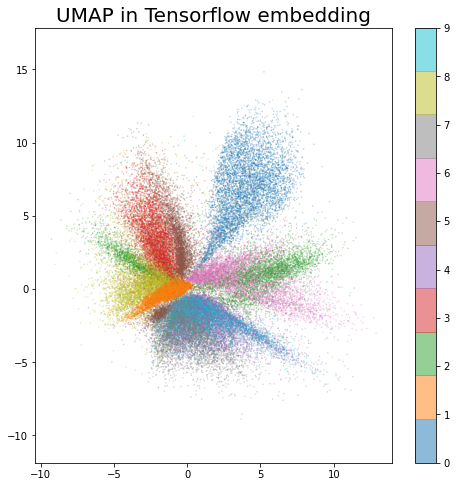

In [58]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=Y_train.astype(int)[:len(embedding)],
    cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("UMAP in Tensorflow embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

### measure at global structure as correlation of pairwise distances

In [59]:
import numpy as np
import scipy.stats
import sklearn

In [60]:
nex = 1000
sample1 = np.random.randint(len(train_images), size=nex)
sample2 = np.random.randint(len(train_images), size=nex)
x1 = train_images[sample1]
x2 = train_images[sample2]
z1 = embedding[sample1]
z2 = embedding[sample2]
x_dist = sklearn.metrics.pairwise_distances(x1, x2).flatten()

z_dist = sklearn.metrics.pairwise_distances(z1, z2).flatten()

corr, p = scipy.stats.pearsonr(x_dist, z_dist)
print("r^2={}, p={}".format(corr, p))

r^2=0.7552577486660205, p=0.0


In [65]:
np.unique(xbins), len(np.unique(xbins))

(array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20]),
 19)

Text(0, 0.5, 'Embedding distances')

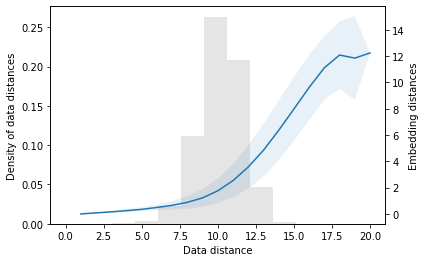

In [66]:
fig, ax = plt.subplots()

ax.hist(x_dist, color = 'k', alpha = 0.1, density=True)
ax.set_ylabel('Density of data distances')
ax.set_xlabel('Data distance')

ax2 = ax.twinx()
bins = np.linspace(np.min(x_dist), np.max(x_dist), 20)
xbins = np.digitize(x_dist, bins = bins)
zmean = np.array([np.mean(z_dist[xbins == i]) for i in np.unique(xbins)])
zstd = np.array([np.std(z_dist[xbins == i]) for i in np.unique(xbins)])
ax2.plot(np.unique(xbins), zmean)
ax2.fill_between(np.unique(xbins), zmean-zstd, zmean+zstd, alpha = 0.1)
ax2.set_ylabel('Embedding distances')


### plotting loss

In [67]:
embedder._history.keys()

dict_keys(['loss', 'global_correlation_loss', 'umap_loss'])

Text(0, 0.5, 'global_correlation_loss')

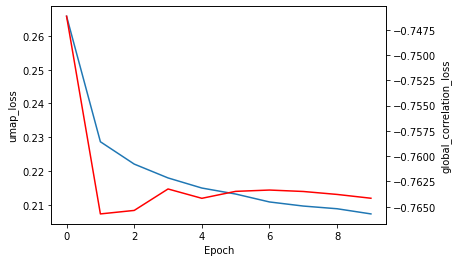

In [68]:
fig, ax = plt.subplots()
ax.plot(embedder._history['umap_loss'])
ax.set_ylabel('umap_loss')
ax.set_xlabel('Epoch')
ax2 = ax.twinx()
ax2.plot(embedder._history['global_correlation_loss'], color = 'r')
ax2.set_ylabel('global_correlation_loss')
